In [1]:
%run My_function.ipynb

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv("Données/les-arbres.csv", sep=";")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207577 entries, 0 to 207576
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   IDBASE                  207577 non-null  int64  
 1   TYPE EMPLACEMENT        207577 non-null  object 
 2   DOMANIALITE             207577 non-null  object 
 3   ARRONDISSEMENT          207577 non-null  object 
 4   COMPLEMENT ADRESSE      54674 non-null   object 
 5   NUMERO                  0 non-null       float64
 6   LIEU / ADRESSE          207577 non-null  object 
 7   IDEMPLACEMENT           207577 non-null  object 
 8   LIBELLE FRANCAIS        206424 non-null  object 
 9   GENRE                   207575 non-null  object 
 10  ESPECE                  205138 non-null  object 
 11  VARIETE OUCULTIVAR      39680 non-null   object 
 12  CIRCONFERENCE (cm)      207577 non-null  int64  
 13  HAUTEUR (m)             207577 non-null  int64  
 14  STADE DE DEVELOPPEME

In [5]:
df.head()

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,189266,Arbre,DASCO,PARIS 6E ARRDT,NaN,NaN,MADAME (5) LYCEE MUNICIPAL,12410001,Marronnier,Aesculus,hippocastanum,NaN,120,10,Adulte,NON,"48.85200371863153, 2.33230540255186"
1,294169,Arbre,Alignement,PARIS 13E ARRDT,NaN,NaN,AVENUE DE CHOISY,000701004,Orme,Ulmus,minor,NaN,120,12,Adulte,NON,"48.82326173239533, 2.3621121211485137"
2,299732,Arbre,Alignement,PARIS 13E ARRDT,NaN,NaN,AVENUE D IVRY,000402012,Marronnier,Aesculus,hippocastanum,''Baumannii'',95,12,Adulte,NON,"48.82316865218306, 2.3661365094471076"
3,2018673,Arbre,Jardin,PARIS 19E ARRDT,NaN,NaN,JARDIN CURIAL - CITE MICHELET / 94 RUE CURIAL,000104013,Copalme,Liquidambar,styraciflua,NaN,0,0,NaN,NON,"48.89592648442437, 2.3758535632233437"
4,2023552,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,719891365,Erable,Acer,campestre,NaN,0,0,NaN,NON,"48.82012923448039, 2.4560002096589297"


In [8]:
epicea = df.loc[df["LIBELLE FRANCAIS"]=="Epicéa"]

In [9]:
data_arbres = epicea[["CIRCONFERENCE (cm)","HAUTEUR (m)"]]

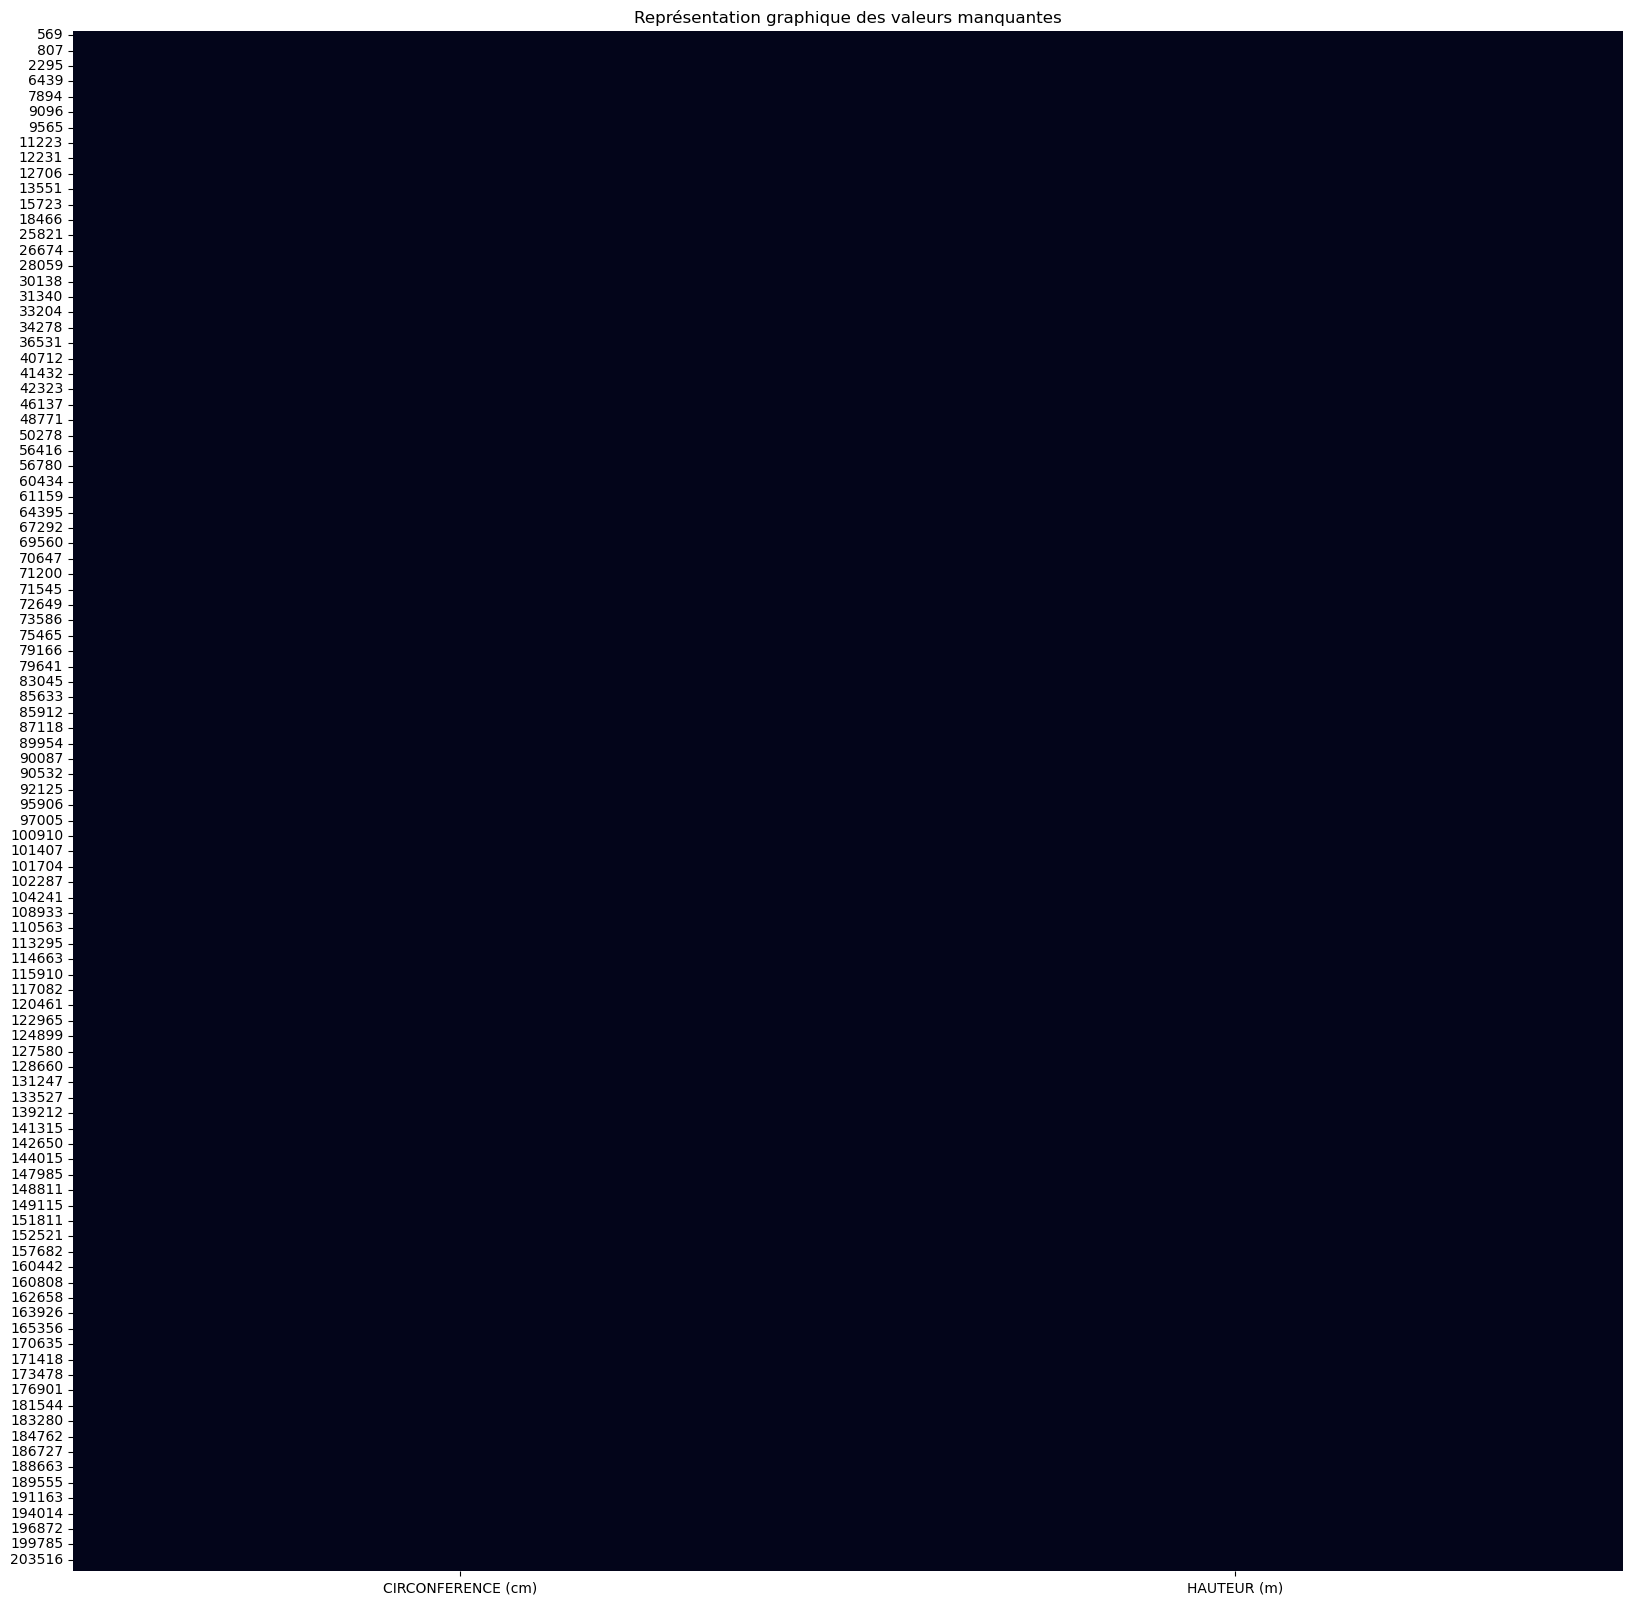

,observations,variables,moyennes,medianes,ecart_types,min,max,nb_valeurs_manquantes,%_valeurs_manquantes
CIRCONFERENCE (cm),200,2,49.375,45.0,40.840717,0,170,0,0.0
HAUTEUR (m),200,2,6.375,6.0,5.290019,0,21,0,0.0


In [11]:
my_first_analyse(data_arbres)

In [21]:
data_arbres = data_arbres.loc[(data_arbres["CIRCONFERENCE (cm)"]!=0) & (data_arbres["HAUTEUR (m)"]!=0)]

In [32]:
data_arbres.rename(columns={"CIRCONFERENCE (cm)":"CIRCONFERENCE","HAUTEUR (m)":"HAUTEUR"}, inplace=True)

/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_77249/1909983573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arbres.rename(columns={"CIRCONFERENCE (cm)":"CIRCONFERENCE","HAUTEUR (m)":"HAUTEUR"}, inplace=True)


In [33]:
data_arbres

,CIRCONFERENCE,HAUTEUR
569,55,8
733,20,4
807,90,12
1942,50,9
2295,25,4
...,...,...
193684,85,11
195817,16,3
196872,35,6
199251,90,16


In [22]:
data_arbres.shape

(148, 2)

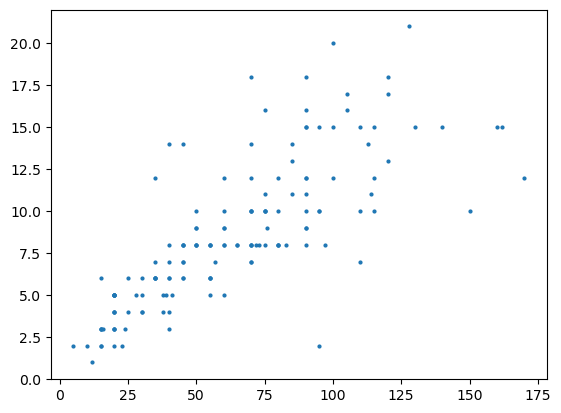

In [24]:
plt.scatter(data_arbres["CIRCONFERENCE (cm)"], data_arbres["HAUTEUR (m)"], s=4)

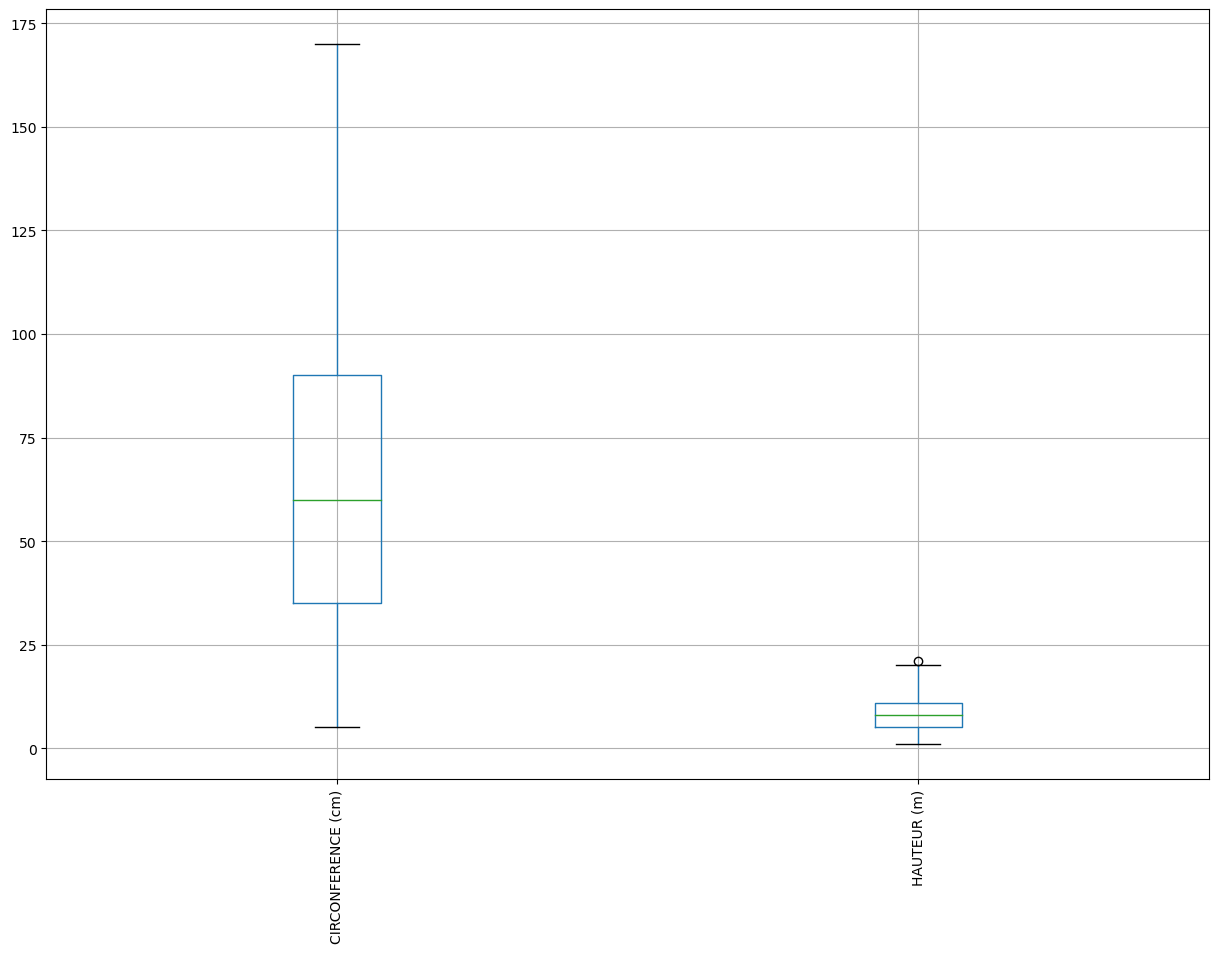

In [26]:
my_boxplots(data_arbres)

In [25]:
my_outliers_zscore(data_arbres)

,CIRCONFERENCE (cm),HAUTEUR (m)
139212,170,12


# Regression linéaire

In [36]:
reg_simple = smf.ols("HAUTEUR ~ CIRCONFERENCE", data=data_arbres).fit()

In [37]:
print(reg_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                HAUTEUR   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           5.46e-30
Time:                        09:00:24   Log-Likelihood:                -359.43
No. Observations:                 148   AIC:                             722.9
Df Residuals:                     146   BIC:                             728.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.6944      0.468      5.757

/Users/sebastienmorichon/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


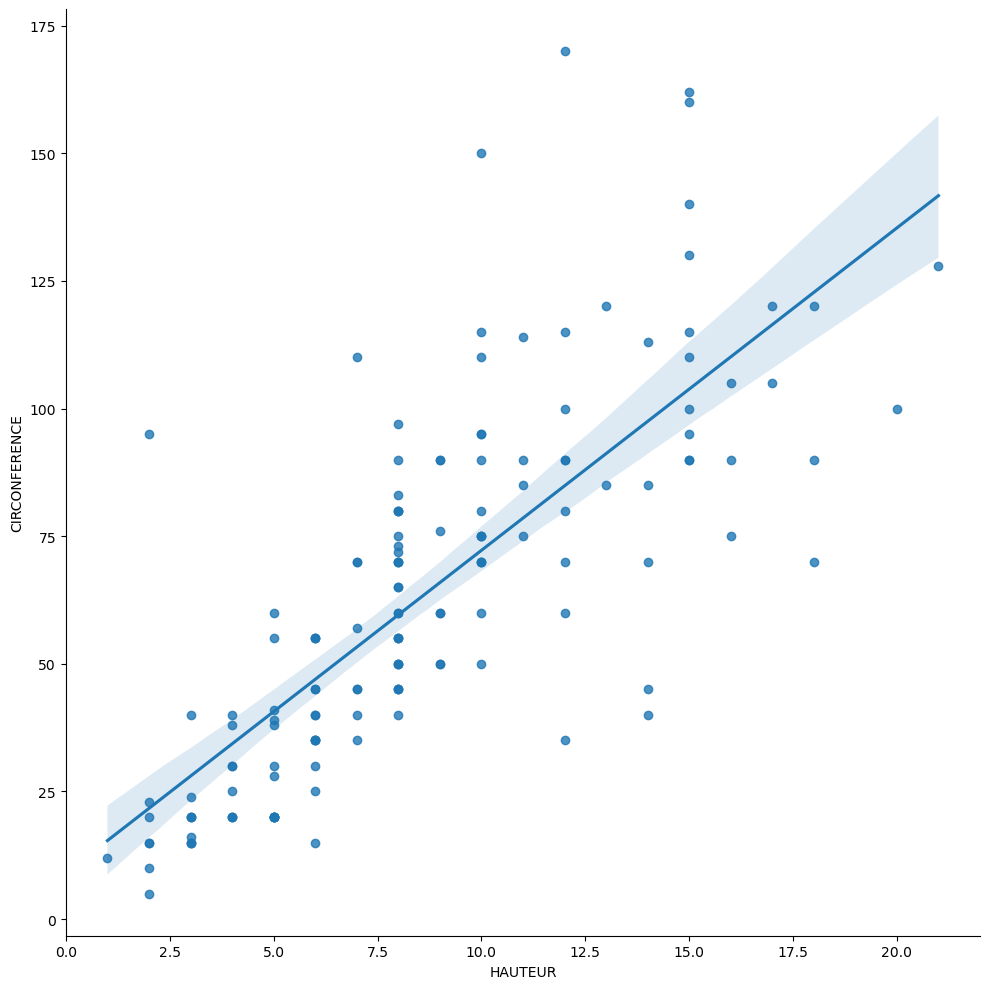

In [49]:
ax = sns.lmplot(x="HAUTEUR", y="CIRCONFERENCE", data=data_arbres, size=10)
plt.show()

## Résidus du model

In [51]:
data_arbres["residus"] = reg_simple.resid

/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_77249/2819567606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arbres["residus"] = reg_simple.resid


<AxesSubplot:xlabel='residus', ylabel='Count'>

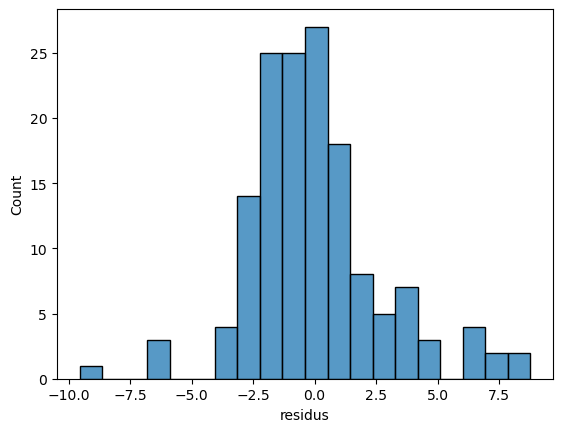

In [52]:
sns.histplot(data=data_arbres["residus"])

## Prévision

In [62]:
liste = [75,96,58,47,95,87,100]

In [63]:
# On créé un tableau pour passer les informations à prévoir
table_prev = pd.DataFrame({"CIRCONFERENCE":liste})
prev = reg_simple.predict(table_prev)
print(prev)

0     9.690049
1    11.648824
2     8.104373
3     7.078348
4    11.555549
5    10.809349
6    12.021924
dtype: float64
